In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Importing Testing data

In [4]:
data = pd.read_excel("New_customer_list_data.xlsx")
data.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


In [5]:
data.tail()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
7762,id_29917,52.0,technician,married,secondary,no,1764.0,yes,no,unknown,863,12,jun,2.0,0,unknown
7763,id_9275,50.0,management,divorced,tertiary,no,401.0,no,no,cellular,843,2,jul,1.0,6,failure
7764,id_16678,56.0,admin.,married,secondary,no,227.0,no,yes,cellular,705,17,nov,1.0,0,unknown
7765,id_26369,28.0,entrepreneur,married,secondary,no,NaN,yes,no,unknown,879,27,may,1.0,0,unknown
7766,id_31483,26.0,technician,single,secondary,no,459.0,no,no,cellular,997,29,jan,1.0,8,other


## Data Description

In [6]:
pd.read_excel("Data_Dictionary.xlsx")

,column,description
0,customer_id,unique identifier for each customer (primary key)
1,customer_age,age of the customer
2,job_type,type of job
3,marital,marital status
4,education,highest educational qualification
5,default,delinquency status
6,balance,current account balance
7,housing_loan,flag indicating customers with home loan
8,personal_loan,flag indicating customers with personal loan
9,communication_type,mode of communication of the previous campaign


## Size of Test data


In [7]:
data.shape

(7767, 16)

## Data types

In [8]:
data.dtypes

customer_id                    object
customer_age                  float64
job_type                       object
marital                        object
education                      object
default                        object
balance                       float64
housing_loan                   object
personal_loan                  object
communication_type             object
last_contact_duration           int64
day_of_month                    int64
month                          object
num_contacts_in_campaign      float64
num_contacts_prev_campaign      int64
prev_campaign_outcome          object
dtype: object

## Check Null Values

In [9]:
data.isnull().sum()

customer_id                     0
customer_age                  142
job_type                        0
marital                        43
education                       0
default                         0
balance                       122
housing_loan                    0
personal_loan                  36
communication_type              0
last_contact_duration           0
day_of_month                    0
month                           0
num_contacts_in_campaign       16
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

customer_age , marital , housing_loan , personal_loan , num_contacts_in_campaign columns contain null values.

## Number of unique counts

In [10]:
def unique(df , column):
    print("Number of unique counts in ",column," : ",df[column].nunique(), " out of rows : ",df.shape[0])

In [11]:
for i in data.columns :
    unique(data,i)

Number of unique counts in  customer_id  :  7767  out of rows :  7767
Number of unique counts in  customer_age  :  72  out of rows :  7767
Number of unique counts in  job_type  :  12  out of rows :  7767
Number of unique counts in  marital  :  3  out of rows :  7767
Number of unique counts in  education  :  4  out of rows :  7767
Number of unique counts in  default  :  2  out of rows :  7767
Number of unique counts in  balance  :  3266  out of rows :  7767
Number of unique counts in  housing_loan  :  2  out of rows :  7767
Number of unique counts in  personal_loan  :  2  out of rows :  7767
Number of unique counts in  communication_type  :  3  out of rows :  7767
Number of unique counts in  last_contact_duration  :  283  out of rows :  7767
Number of unique counts in  day_of_month  :  31  out of rows :  7767
Number of unique counts in  month  :  12  out of rows :  7767
Number of unique counts in  num_contacts_in_campaign  :  38  out of rows :  7767
Number of unique counts in  num_conta

## Statistical Description of features in test data

In [12]:
data.describe()

,customer_age,balance,last_contact_duration,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign
count,7625.000000,7645.000000,7767.000000,7767.000000,7751.000000,7767.000000
mean,40.575475,1380.914454,854.417536,15.886958,2.780544,0.615553
std,10.745877,3280.231914,74.628693,8.328768,3.169323,2.069363
min,18.000000,-4062.000000,663.000000,1.000000,1.000000,0.000000
25%,32.000000,74.000000,809.000000,8.000000,1.000000,0.000000
50%,39.000000,465.000000,871.000000,16.000000,2.000000,0.000000
75%,48.000000,1429.000000,897.000000,21.000000,3.000000,0.000000
max,97.000000,102128.000000,1020.000000,31.000000,46.000000,55.000000


In [13]:
data.describe(include = ['O'])

,customer_id,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
count,7767,7767,7724,7767,7767,7767,7731,7767,7767,7767
unique,7767,12,3,4,2,2,2,3,12,4
top,id_35675,management,married,secondary,no,yes,no,cellular,may,unknown
freq,1,1660,4674,3917,7642,4331,6462,4994,2354,6320


## Graphical EDA

Distplot for all numerical features in test data

In [14]:
col = [col for col in data.columns if data[col].dtype != 'O']
col

['customer_age',
 'balance',
 'last_contact_duration',
 'day_of_month',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign']

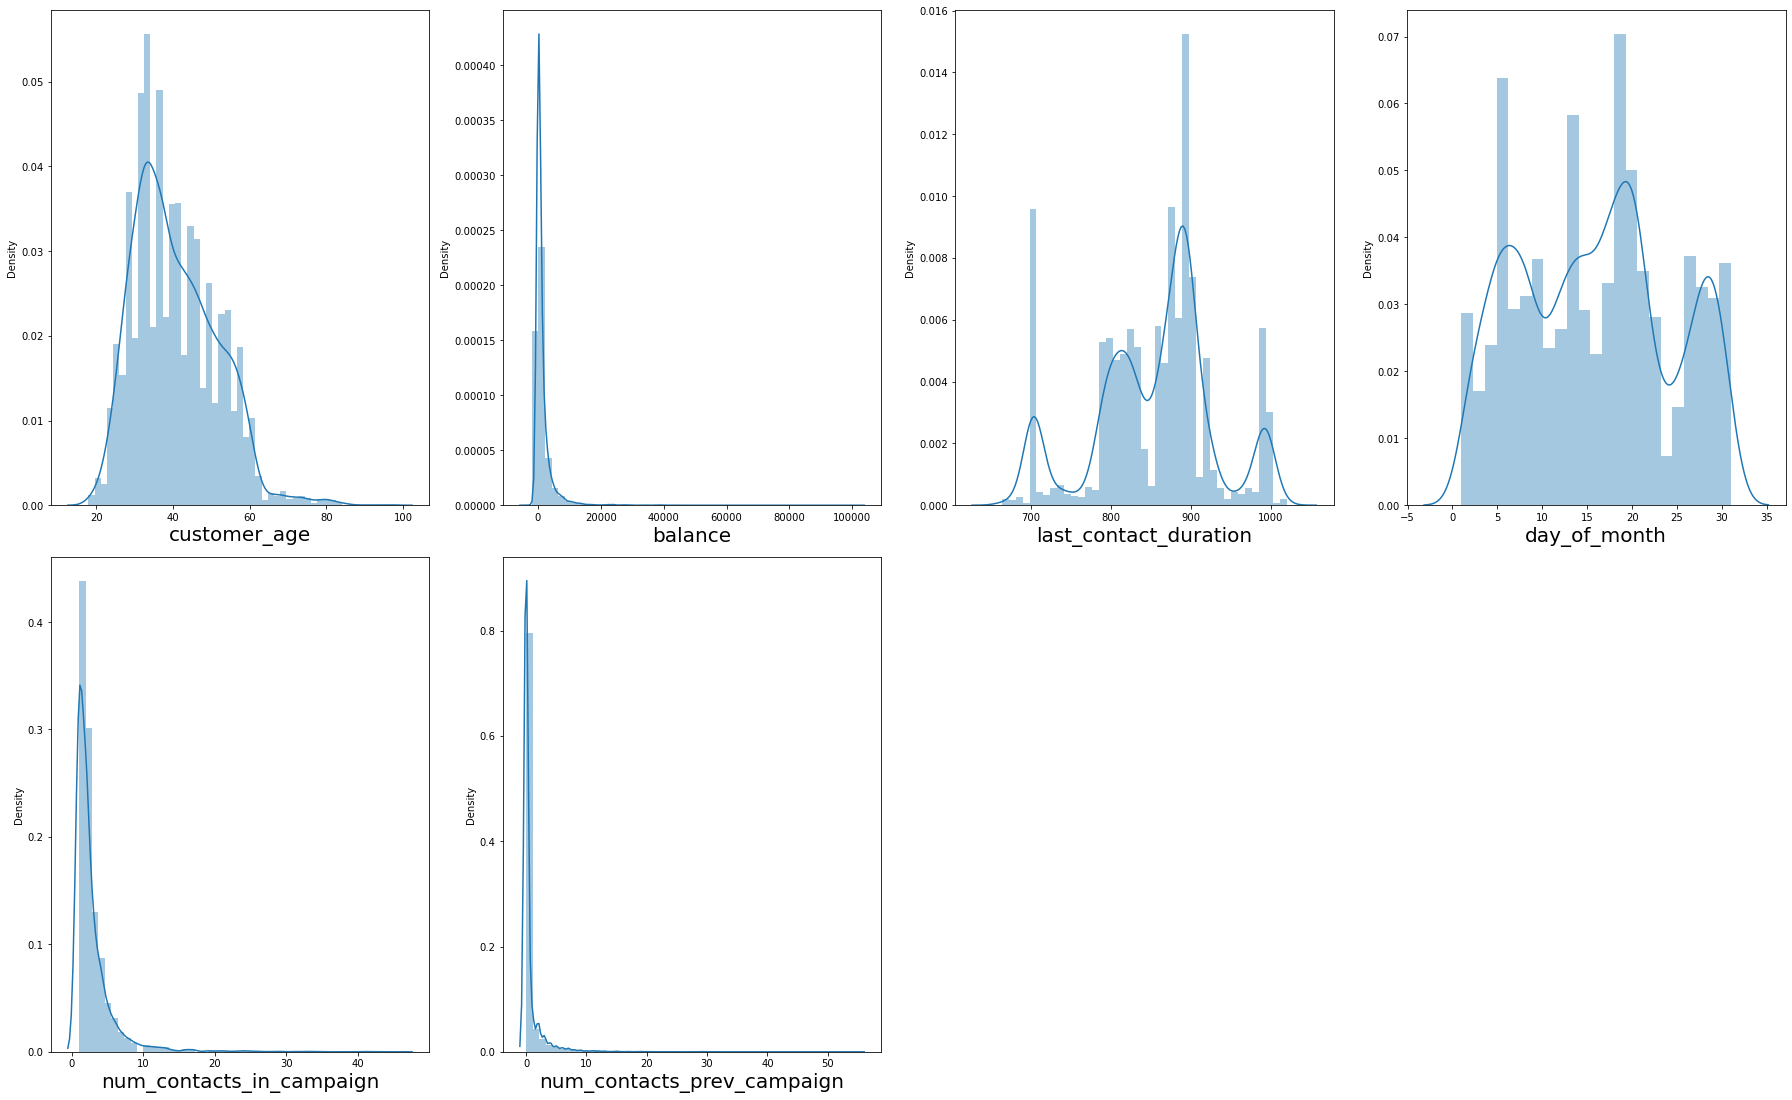

In [15]:
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in col:
    if plotnumber<=7 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
categorical = [col for col in data.columns if data[col].dtype == 'O']
categorical

['customer_id',
 'job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

## Detect Outlier

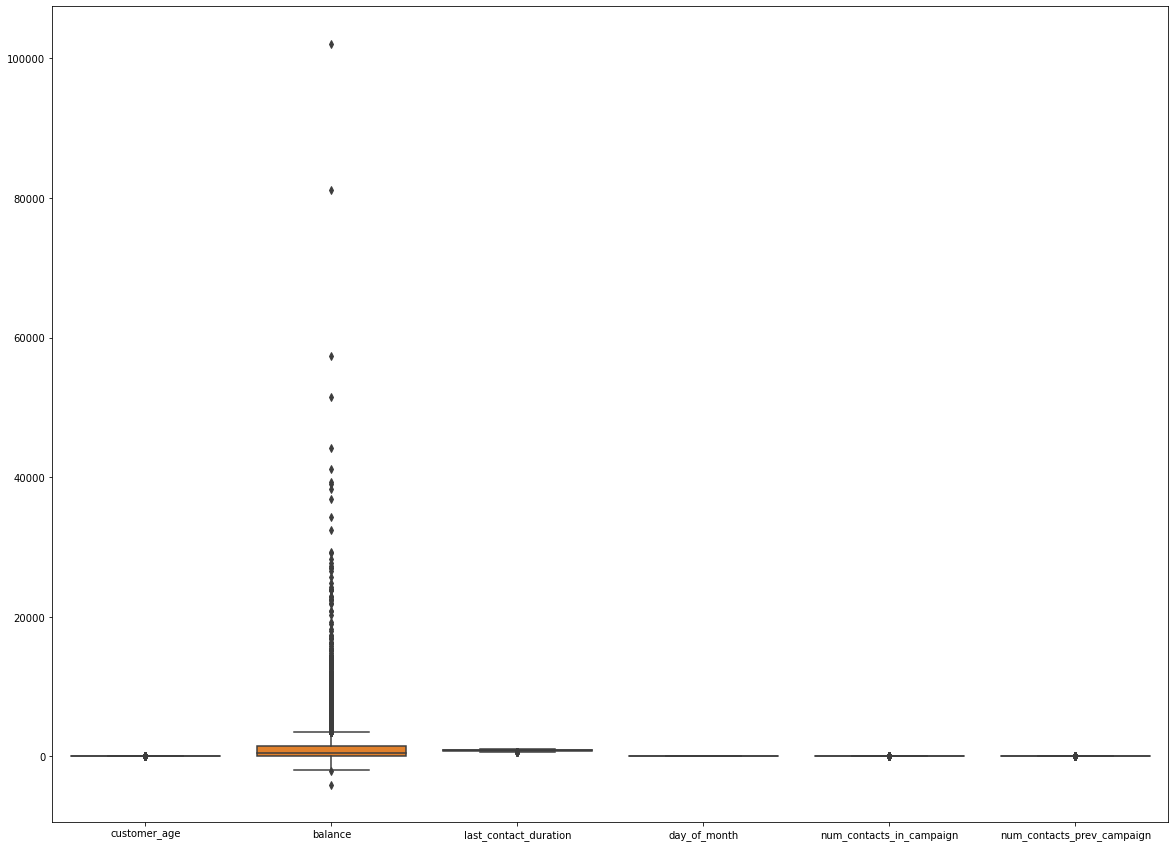

In [17]:
plt.figure(figsize = (20,15),facecolor='white')
sns.boxplot(data = data)
plt.show()

In [18]:
col = [column for column in data.columns if data[column].dtype != 'O']
col

['customer_age',
 'balance',
 'last_contact_duration',
 'day_of_month',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign']

In [19]:
for k, v in data[col].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column customer_age outliers = 0.95%
Column balance outliers = 9.99%
Column last_contact_duration outliers = 0.28%
Column day_of_month outliers = 0.00%
Column num_contacts_in_campaign outliers = 9.73%
Column num_contacts_prev_campaign outliers = 100.00%


# Handling Null Values


In [20]:
total = data.isnull().sum().sort_values(ascending = False)
percentage = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending = False)
df = pd.concat([total , percentage],axis = 1 , keys = ['total','percent'])
df

,total,percent
customer_age,142,1.828248
balance,122,1.570748
marital,43,0.553624
personal_loan,36,0.463499
num_contacts_in_campaign,16,0.206000
prev_campaign_outcome,0,0.000000
num_contacts_prev_campaign,0,0.000000
month,0,0.000000
day_of_month,0,0.000000
last_contact_duration,0,0.000000


## Heat Map for Null value Analysis

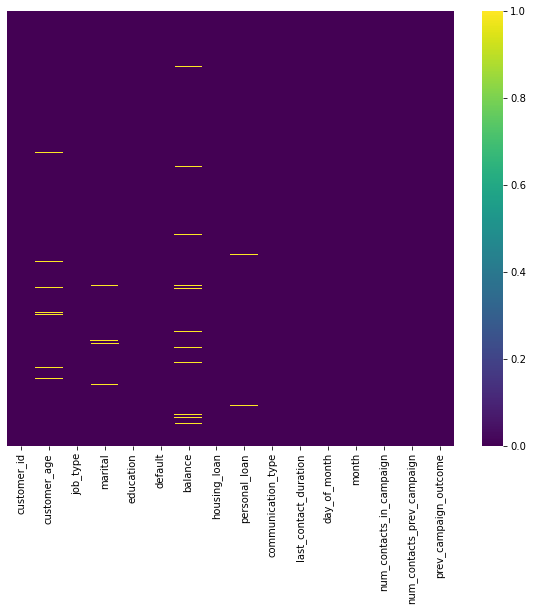

In [21]:
plt.figure(figsize = (10,8))
sns.heatmap(data = data.isnull() ,cmap = "viridis" , yticklabels = False )

In [22]:
df_null = data[["customer_age","balance","marital","personal_loan","num_contacts_in_campaign"]]
df_null

,customer_age,balance,marital,personal_loan,num_contacts_in_campaign
0,28.0,285.0,single,no,4.0
1,46.0,656.0,married,no,4.0
2,34.0,2.0,single,no,3.0
3,65.0,2880.0,married,no,1.0
4,52.0,1779.0,married,no,3.0
...,...,...,...,...,...
7762,52.0,1764.0,married,no,2.0
7763,50.0,401.0,divorced,no,1.0
7764,56.0,227.0,married,yes,1.0
7765,28.0,NaN,married,no,1.0


In [23]:
#### mean Imputation method for "customer_age"
data["customer_age"].fillna(data["customer_age"].mean(),inplace = True)

In [24]:
#### mean Imputation method for "balance"
data["balance"].fillna(data["balance"].mean(),inplace = True)

In [25]:
#### mean Imputation method for "num_contacts_in_campaign"
data["num_contacts_in_campaign"].fillna(data["num_contacts_in_campaign"].median(),inplace = True)

In [26]:
#### higest frequency method used for "marital" feature
data["marital"].fillna('unknown',inplace = True)

In [27]:
# higest frequency method used for "personal_loan" feature
data["personal_loan"].fillna(data["personal_loan"].value_counts().index[0],inplace = True)

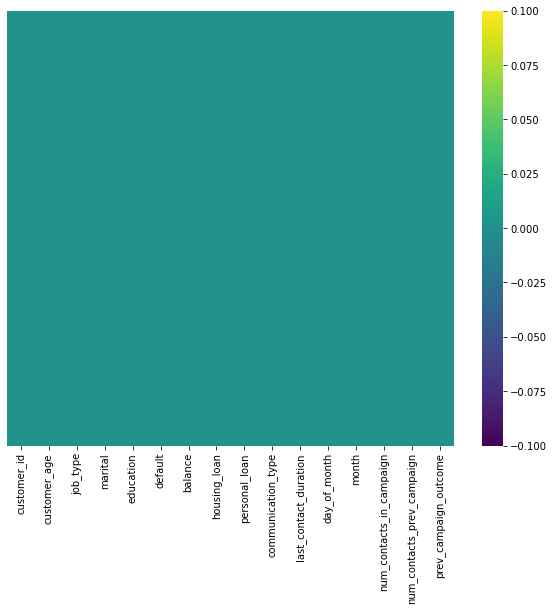

In [28]:
plt.figure(figsize = (10,8))
sns.heatmap(data = data.isnull() ,cmap = "viridis" , yticklabels = False )

## Handling categorical value

In [29]:
df_customer_id = data["customer_id"]

In [30]:
data.drop('customer_id', axis=1, inplace=True)
data.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


In [31]:
categorical_features = [col for col in data.columns if data[col].dtype == 'O']
categorical_features

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [32]:
for x in categorical_features:
    print(x,"==>",data[x].unique())

job_type ==> ['management' 'technician' 'services' 'retired' 'blue-collar' 'admin.'
 'self-employed' 'housemaid' 'entrepreneur' 'unemployed' 'student'
 'unknown']
marital ==> ['single' 'married' 'divorced' 'unknown']
education ==> ['tertiary' 'secondary' 'primary' 'unknown']
default ==> ['no' 'yes']
housing_loan ==> ['yes' 'no']
personal_loan ==> ['no' 'yes']
communication_type ==> ['unknown' 'cellular' 'telephone']
month ==> ['jun' 'feb' 'may' 'apr' 'nov' 'aug' 'oct' 'jul' 'jan' 'dec' 'mar' 'sep']
prev_campaign_outcome ==> ['unknown' 'failure' 'other' 'success']


In [33]:
data['marital'].replace({'married': 1 ,'single' : 2 ,'divorced' :3 ,'unknown' : 0}, inplace=True)
data['marital'].astype(int)
data['education'].replace({'secondary':2 ,'primary':1 ,'tertiary':3,'unknown' : 0}, inplace=True)
data['education'].astype(int)
data['default'].replace({'no':0 , 'yes':1}, inplace=True)
data['default'].astype(int)
data['housing_loan'].replace({'no':0 , 'yes':1}, inplace=True)
data['housing_loan'].astype(int)
data['personal_loan'].replace({'no':0 , 'yes':1}, inplace=True)
data['personal_loan'].astype(int)
data['communication_type'].replace({'cellular':1 ,'unknown':0 ,'telephone':2}, inplace=True)
data['communication_type'].astype(int)
data['prev_campaign_outcome'].replace({'other':3,'unknown':0,'failure':1 ,'success':2}, inplace=True)
data['prev_campaign_outcome'].astype(int)
data['month'].replace({'nov':10 ,'may':4 ,'aug':7 ,'apr':3 ,'feb':1 ,'jun':5 ,'jul':6 ,'jan':0 ,'oct':9 ,'sep':8 ,'mar':2 ,'dec':11}, inplace=True)
data['month'].astype(int)
data['job_type'].replace({'blue-collar':11,'management':10,'technician':9,'services':8,'retired':7,'entrepreneur':6,'admin.':5,'student':4,'housemaid':3,'self-employed':2,'unknown':0,'unemployed':1}, inplace=True)
data['job_type'].astype(int)

0       10
1        9
2        8
3        7
4       11
        ..
7762     9
7763    10
7764     5
7765     6
7766     9
Name: job_type, Length: 7767, dtype: int32

In [34]:
data.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,28.0,10,2,3,0,285.0,1,0,0,849,26,5,4.0,0,0
1,46.0,9,1,2,0,656.0,0,0,1,990,5,1,4.0,0,0
2,34.0,8,2,2,0,2.0,1,0,0,886,20,4,3.0,0,0
3,65.0,7,1,1,0,2880.0,0,0,1,913,23,3,1.0,0,0
4,52.0,11,1,3,0,1779.0,0,0,1,703,19,10,3.0,1,1


## saving data

In [35]:
data["having_loan"] = data["housing_loan"] + data["personal_loan"]
data.drop(columns = ["housing_loan","personal_loan"],inplace = True)
data.head()

,customer_age,job_type,marital,education,default,balance,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,having_loan
0,28.0,10,2,3,0,285.0,0,849,26,5,4.0,0,0,1
1,46.0,9,1,2,0,656.0,1,990,5,1,4.0,0,0,0
2,34.0,8,2,2,0,2.0,0,886,20,4,3.0,0,0,1
3,65.0,7,1,1,0,2880.0,1,913,23,3,1.0,0,0,0
4,52.0,11,1,3,0,1779.0,1,703,19,10,3.0,1,1,0


In [36]:
newdata = data[["customer_age","job_type","balance","having_loan","last_contact_duration","prev_campaign_outcome","num_contacts_in_campaign","num_contacts_prev_campaign"]]

In [37]:
newdata.head()

,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign
0,28.0,10,285.0,1,849,0,4.0,0
1,46.0,9,656.0,0,990,0,4.0,0
2,34.0,8,2.0,1,886,0,3.0,0
3,65.0,7,2880.0,0,913,0,1.0,0
4,52.0,11,1779.0,0,703,1,3.0,1


In [38]:
newdata.shape

(7767, 8)

In [39]:
newdata.to_csv('prediction_data.csv')

## Collection top 1000 features

In [41]:
Data = pd.read_csv("prediction_data.csv")
Data = Data.drop(columns = ["Unnamed: 0"])
Data.head()

,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign
0,28.0,10,285.0,1,849,0,4.0,0
1,46.0,9,656.0,0,990,0,4.0,0
2,34.0,8,2.0,1,886,0,3.0,0
3,65.0,7,2880.0,0,913,0,1.0,0
4,52.0,11,1779.0,0,703,1,3.0,1


In [42]:
Df = Data.values
Df

array([[2.80000000e+01, 1.00000000e+01, 2.85000000e+02, ...,
        0.00000000e+00, 4.00000000e+00, 0.00000000e+00],
       [4.60000000e+01, 9.00000000e+00, 6.56000000e+02, ...,
        0.00000000e+00, 4.00000000e+00, 0.00000000e+00],
       [3.40000000e+01, 8.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       ...,
       [5.60000000e+01, 5.00000000e+00, 2.27000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.80000000e+01, 6.00000000e+00, 1.38091445e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.60000000e+01, 9.00000000e+00, 4.59000000e+02, ...,
        3.00000000e+00, 1.00000000e+00, 8.00000000e+00]])

## Prediction using AdaBoostClassifier

In [43]:
import pickle
model = pickle.load(open("ada_model.pickle","rb"))
scalar = pickle.load(open("finalized_scalar.pickle","rb"))

In [44]:
ada_lt = []

In [5]:
for i in range(len(Df)):
    scaled_data = scalar.transform([Df[i]])
    prediction = model.predict(scaled_data)
    ada_lt.append(prediction)
    print(prediction)

NameError: name 'ada_lt' is not defined

In [46]:
pred_data = pd.DataFrame(ada_lt,columns = ["Predication"])
pred_data

,Predication
0,0
1,0
2,0
3,0
4,0
...,...
7762,0
7763,0
7764,0
7765,0


In [47]:
result = pd.concat([df_customer_id,Data,pred_data],axis = 1)
result

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
0,id_43823,28.0,10,285.000000,1,849,0,4.0,0,0
1,id_10523,46.0,9,656.000000,0,990,0,4.0,0,0
2,id_43951,34.0,8,2.000000,1,886,0,3.0,0,0
3,id_12681,65.0,7,2880.000000,0,913,0,1.0,0,0
4,id_2153,52.0,11,1779.000000,0,703,1,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...
7762,id_29917,52.0,9,1764.000000,1,863,0,2.0,0,0
7763,id_9275,50.0,10,401.000000,0,843,1,1.0,6,0
7764,id_16678,56.0,5,227.000000,1,705,0,1.0,0,0
7765,id_26369,28.0,6,1380.914454,1,879,0,1.0,0,0


In [48]:
final_data = result[result["Predication"] == 1]
final_data.head()

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
86,id_1895,33.0,9,804.0,0,826,2,3.0,1,1
92,id_33092,46.0,11,637.0,1,955,2,1.0,4,1
156,id_45113,62.0,7,5267.0,0,984,0,3.0,0,1
200,id_12016,37.0,10,2645.0,0,740,2,1.0,1,1
218,id_6592,29.0,8,339.0,0,689,2,1.0,1,1


In [49]:
final_data.shape

(237, 10)

In [51]:
final_data.to_csv("ada_predicition_data.csv")

## Prediction using DecisionTreeClassifier 

In [1]:
import pandas as pd
Data = pd.read_csv("prediction_data.csv")
Data = Data.drop(columns = ["Unnamed: 0"])
Data.head()

,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign
0,28.0,10,285.0,1,849,0,4.0,0
1,46.0,9,656.0,0,990,0,4.0,0
2,34.0,8,2.0,1,886,0,3.0,0
3,65.0,7,2880.0,0,913,0,1.0,0
4,52.0,11,1779.0,0,703,1,3.0,1


In [2]:
Df = Data.values
Df

array([[2.80000000e+01, 1.00000000e+01, 2.85000000e+02, ...,
        0.00000000e+00, 4.00000000e+00, 0.00000000e+00],
       [4.60000000e+01, 9.00000000e+00, 6.56000000e+02, ...,
        0.00000000e+00, 4.00000000e+00, 0.00000000e+00],
       [3.40000000e+01, 8.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       ...,
       [5.60000000e+01, 5.00000000e+00, 2.27000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.80000000e+01, 6.00000000e+00, 1.38091445e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.60000000e+01, 9.00000000e+00, 4.59000000e+02, ...,
        3.00000000e+00, 1.00000000e+00, 8.00000000e+00]])

In [3]:
import pickle
model = pickle.load(open("decisiontree_model.pickle","rb"))
scalar = pickle.load(open("finalized_scalar.pickle","rb"))

In [4]:
tree_lt = []
for i in range(len(Df)):
    scaled_data = scalar.transform([Df[i]])
    prediction = model.predict(scaled_data)
    tree_lt.append(prediction)
    print(prediction)

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [6]:
pred_data = pd.DataFrame(tree_lt,columns = ["Predication"])
pred_data

,Predication
0,0
1,0
2,0
3,0
4,0
...,...
7762,0
7763,0
7764,0
7765,0


In [7]:
Data = pd.read_csv("prediction_data.csv")
Data = Data.drop(columns = ["Unnamed: 0"])
Data.head()

,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign
0,28.0,10,285.0,1,849,0,4.0,0
1,46.0,9,656.0,0,990,0,4.0,0
2,34.0,8,2.0,1,886,0,3.0,0
3,65.0,7,2880.0,0,913,0,1.0,0
4,52.0,11,1779.0,0,703,1,3.0,1


In [8]:
df = pd.read_excel("New_customer_list_data.xlsx")
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


In [9]:
result = pd.concat([df["customer_id"],Data,pred_data],axis = 1)
result

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
0,id_43823,28.0,10,285.000000,1,849,0,4.0,0,0
1,id_10523,46.0,9,656.000000,0,990,0,4.0,0,0
2,id_43951,34.0,8,2.000000,1,886,0,3.0,0,0
3,id_12681,65.0,7,2880.000000,0,913,0,1.0,0,0
4,id_2153,52.0,11,1779.000000,0,703,1,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...
7762,id_29917,52.0,9,1764.000000,1,863,0,2.0,0,0
7763,id_9275,50.0,10,401.000000,0,843,1,1.0,6,0
7764,id_16678,56.0,5,227.000000,1,705,0,1.0,0,0
7765,id_26369,28.0,6,1380.914454,1,879,0,1.0,0,0


In [10]:
final_data = result[result["Predication"] == 1]
final_data.head()

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
53,id_3135,34.0,2,1356.0,1,892,2,1.0,2,1
86,id_1895,33.0,9,804.0,0,826,2,3.0,1,1
92,id_33092,46.0,11,637.0,1,955,2,1.0,4,1
93,id_37445,44.0,10,147.0,1,997,2,1.0,2,1
200,id_12016,37.0,10,2645.0,0,740,2,1.0,1,1


In [12]:
final_data.shape

(287, 10)

In [13]:
final_data.to_csv("Tree_predicition_data.csv")

## Prediction using XGBCLASSIFIER

In [14]:
import pickle
model = pickle.load(open("xgb_model.pickle","rb"))

In [15]:
xgb_lt = []
for i in range(len(Df)):
    scaled_data = scalar.transform([Df[i]])
    prediction = model.predict(scaled_data)
    xgb_lt.append(prediction)
    print(prediction)

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]


In [16]:
pred_data = pd.DataFrame(xgb_lt,columns = ["Predication"])
pred_data

,Predication
0,0
1,0
2,0
3,0
4,0
...,...
7762,0
7763,0
7764,0
7765,0


In [17]:
result = pd.concat([df["customer_id"],Data,pred_data],axis = 1)
result

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
0,id_43823,28.0,10,285.000000,1,849,0,4.0,0,0
1,id_10523,46.0,9,656.000000,0,990,0,4.0,0,0
2,id_43951,34.0,8,2.000000,1,886,0,3.0,0,0
3,id_12681,65.0,7,2880.000000,0,913,0,1.0,0,0
4,id_2153,52.0,11,1779.000000,0,703,1,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...
7762,id_29917,52.0,9,1764.000000,1,863,0,2.0,0,0
7763,id_9275,50.0,10,401.000000,0,843,1,1.0,6,0
7764,id_16678,56.0,5,227.000000,1,705,0,1.0,0,0
7765,id_26369,28.0,6,1380.914454,1,879,0,1.0,0,0


In [18]:
final_data = result[result["Predication"] == 1]
final_data.head()

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
86,id_1895,33.0,9,804.0,0,826,2,3.0,1,1
92,id_33092,46.0,11,637.0,1,955,2,1.0,4,1
156,id_45113,62.0,7,5267.0,0,984,0,3.0,0,1
200,id_12016,37.0,10,2645.0,0,740,2,1.0,1,1
218,id_6592,29.0,8,339.0,0,689,2,1.0,1,1


In [19]:
final_data.shape

(224, 10)

In [20]:
final_data.to_csv("xgb_predicition_data.csv")

## Intersection of Union output dataframe

In [22]:
ada_df = pd.read_csv("ada_predicition_data.csv")
ada_df = ada_df.drop(columns = ["Unnamed: 0"])
ada_df.head()

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
0,id_1895,33.0,9,804.0,0,826,2,3.0,1,1
1,id_33092,46.0,11,637.0,1,955,2,1.0,4,1
2,id_45113,62.0,7,5267.0,0,984,0,3.0,0,1
3,id_12016,37.0,10,2645.0,0,740,2,1.0,1,1
4,id_6592,29.0,8,339.0,0,689,2,1.0,1,1


In [23]:
tree_df = pd.read_csv("Tree_predicition_data.csv")
tree_df = tree_df.drop(columns = ["Unnamed: 0"])
tree_df.head()

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
0,id_3135,34.0,2,1356.0,1,892,2,1.0,2,1
1,id_1895,33.0,9,804.0,0,826,2,3.0,1,1
2,id_33092,46.0,11,637.0,1,955,2,1.0,4,1
3,id_37445,44.0,10,147.0,1,997,2,1.0,2,1
4,id_12016,37.0,10,2645.0,0,740,2,1.0,1,1


In [24]:
xgb_df = pd.read_csv("xgb_predicition_data.csv")
xgb_df = xgb_df.drop(columns = ["Unnamed: 0"])
xgb_df.head()

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
0,id_1895,33.0,9,804.0,0,826,2,3.0,1,1
1,id_33092,46.0,11,637.0,1,955,2,1.0,4,1
2,id_45113,62.0,7,5267.0,0,984,0,3.0,0,1
3,id_12016,37.0,10,2645.0,0,740,2,1.0,1,1
4,id_6592,29.0,8,339.0,0,689,2,1.0,1,1


In [27]:
union = pd.concat([ada_df,tree_df,xgb_df], ignore_index=True).drop_duplicates()
union

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
0,id_1895,33.0,9,804.0,0,826,2,3.0,1,1
1,id_33092,46.0,11,637.0,1,955,2,1.0,4,1
2,id_45113,62.0,7,5267.0,0,984,0,3.0,0,1
3,id_12016,37.0,10,2645.0,0,740,2,1.0,1,1
4,id_6592,29.0,8,339.0,0,689,2,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...
514,id_500,33.0,10,2671.0,1,703,2,1.0,2,1
519,id_7108,24.0,4,432.0,0,795,2,11.0,5,1
590,id_11877,69.0,7,453.0,0,962,0,1.0,0,1
649,id_28251,66.0,7,313.0,0,978,0,1.0,0,1


In [28]:
## for training data
duplicate_train = union[union.duplicated()]
duplicate_train.shape

(0, 10)

In [29]:
union.shape

(343, 10)

In [30]:
union.to_csv("Union_dataset_all_three_model.csv")